In [1]:
#loading the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

fake = pd.read_csv("dataset/Fake.csv")
true = pd.read_csv("dataset/True.csv")

# Assign labels
fake["category"] = 0   # FAKE
true["category"] = 1   # REAL

In [2]:
df = pd.concat([fake, true], axis=0)


In [3]:
df = df.sample(frac=1).reset_index(drop=True)


In [4]:
df.head()

,title,text,subject,date,category
0,Armed US immigration Officers to Be Stationed ...,21st Century Wire says This latest move by the...,US_News,"July 10, 2017",0
1,Trump’s Campaign MAJORLY F*cks Up By Accident...,Donald Trump s best efforts to smear Democrati...,News,"May 25, 2016",0
2,WOW! TX Congressman On IMPEACHMENT And REMOVAL...,Fox News host Bill Hemmer asked Congressman Mi...,left-news,"Nov 2, 2016",0
3,German anti-immigrant candidate walks out of T...,BERLIN (Reuters) - One of the top candidates f...,worldnews,"September 6, 2017",1
4,Most American voters support limited travel ba...,NEW YORK (Reuters) - Six in 10 American voters...,politicsNews,"July 5, 2017",1


In [5]:
df.shape

(44898, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [7]:
df.text[10]

'Military veterans are expressing extreme concerns about the behavior and reaction of Donald Trump to the revelation that hackers under the employ of Russia stole information from Democrats and passed it on to WikiLeaks in an attempt to influence the result of the election. While Donald Trump and congressional Republicans have down played this information, veterans are now pushing back.Retired Major General Paul D. Eaton, senior adviser to VoteVets.org, has released a statement blasting the Trump/Republican reaction to this dangerous moment:When you see a President-elect of the United States so enamored by the Russian regime, as well as are his National Security Adviser and potential Secretary of State, and then find out the Russian government interfered in our election to help that side, it is cause for alarm.We join Senator Wyden and other Intelligence Committee members in calling for materials on Russian hacking that can be declassified to be immediately released to the public. We a

In [8]:
##Preprocessing

In [9]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,true]).reset_index(drop=True)


In [10]:
# Porter2 stemmer 

In [11]:
!pip install nltk


In [12]:
import nltk
from nltk.stem import SnowballStemmer


In [13]:
stemmer = SnowballStemmer("english")


In [14]:
text = ['Fake news is a type of yellow journalism or propaganda']

stemmed_text = [
    " ".join(stemmer.stem(word) for word in sentence.split())
    for sentence in text
]

stemmed_text


['fake news is a type of yellow journal or propaganda']

In [15]:
# Tokenize the text
words = text[0].split()
stems = [stemmer.stem(word) for word in words]
print(stems)

['fake', 'news', 'is', 'a', 'type', 'of', 'yellow', 'journal', 'or', 'propaganda']


In [16]:
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk

# Download the 'stopwords' dataset if it's not already downloaded
nltk.download('stopwords')

# Initialize the Snowball stemmer for english
stemmer = SnowballStemmer("english")

# The stemmer on the text data
def stemming(content):
    con = re.sub('[^a-zA-Z]', ' ', content)
    con = con.lower()
    con = con.split()
    # Apply the Snowball stemmer and filter out the stopwords
    con = [stemmer.stem(word) for word in con if not word in stopwords.words('english')]
    stems = ' '.join(con)

    return stems

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stemming('Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.')

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam'

In [18]:
df['text']

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44893    BRUSSELS (Reuters) - NATO allies on Tuesday we...
44894    LONDON (Reuters) - LexisNexis, a provider of l...
44895    MINSK (Reuters) - In the shadow of disused Sov...
44896    MOSCOW (Reuters) - Vatican Secretary of State ...
44897    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 44898, dtype: object

In [19]:
# Download the 'stopwords' dataset if it's not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Initialize the Snowball stemmer for english
stemmer = SnowballStemmer("english")

In [21]:
# The stemmer on the text data
def stemming(content):
    con = re.sub('[^a-zA-Z]', ' ', content)
    con = con.lower()
    con = con.split()
    # Apply the Snowball stemmer and filter out the stopwords
    con = [stemmer.stem(word) for word in con if not word in stopwords.words('english')]
    stems = ' '.join(con)

    return stems

In [22]:
stemming('Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.')

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam'

In [23]:
df.columns


Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')

In [24]:
df["label"] = df["category"].map({
    1: "REAL",
    0: "FAKE"
})


In [25]:
df[["category", "label"]].head()


,category,label
0,0,FAKE
1,0,FAKE
2,0,FAKE
3,0,FAKE
4,0,FAKE


## Visualization

In [26]:
!pip install matplotlib seaborn


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

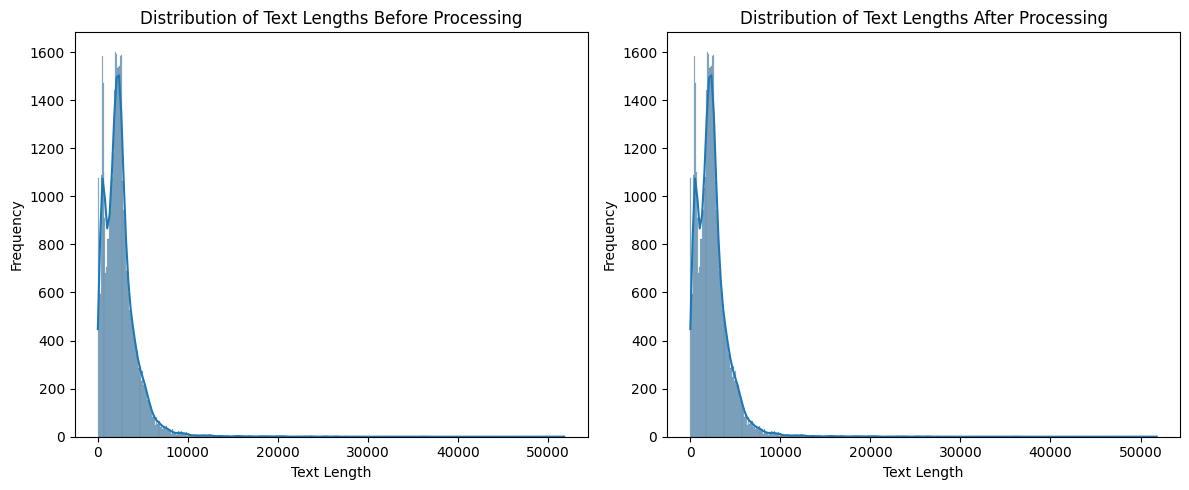

In [28]:


#length of each text before processing
original_text_lengths = [len(text) for text in df['text'] ] # Replace with your original text data

# length of each text after processing
processed_text_lengths = [len(text) for text in df['text'] ] # Replace with your processed text data
# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of text lengths before processing
sns.histplot(original_text_lengths, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Text Lengths Before Processing')
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')

# Plot the distribution of text lengths after processing
sns.histplot(processed_text_lengths, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Text Lengths After Processing')
ax[1].set_xlabel('Text Length')
ax[1].set_ylabel('Frequency')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

##  Split the dataset into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X = df["text"]
y = df["category"]   # 1 = REAL, 0 = FAKE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7, stratify=y
)


In [32]:
# Join the tokens back into single strings
#X_train = [' '.join(doc) for doc in X_train]
#X_test = [' '.join(doc) for doc in X_test] dONT Use this 

In [33]:
X_train

32543    WASHINGTON (Reuters) - About three months ago,...
7381     Ted Cruz is all about the transformative love ...
38012    SOFIA (Reuters) - Nine people were killed and ...
39445    ABIDJAN (Reuters) - More than half a million p...
40395    VIENNA (Reuters) - Austria s president gave th...
                               ...                        
11531                                                     
36771    ADEN (Reuters) - Former Yemeni President Ali A...
14235    No matter which candidate you support, this mo...
27218    WASHINGTON (Reuters) - President Donald Trump ...
16724    Support for an investigation into the shooting...
Name: text, Length: 35918, dtype: object

## Feature Engineering on text data (TF-IDF)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [35]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train and test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

##  Model Training

In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [37]:
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = pac.predict(tfidf_test)

In [38]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], shape=(8980,))

##  Evaluate the Model

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(score*100, 2)}%")

Accuracy score: 99.51%


In [41]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Create confusion matrix (numeric labels)
cm = confusion_matrix(
    y_test,
    y_pred,
    labels=[0, 1]   # 0 = FAKE, 1 = REAL
)

# Display in readable form
cm_df = pd.DataFrame(
    cm,
    index=["FAKE", "REAL"],
    columns=["FAKE", "REAL"]
)

cm_df


,FAKE,REAL
FAKE,4675,21
REAL,23,4261


Accuracy: 99.42%

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.99      1.00      0.99      4696
        REAL       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
      FAKE  REAL
FAKE  4673    23
REAL    29  4255


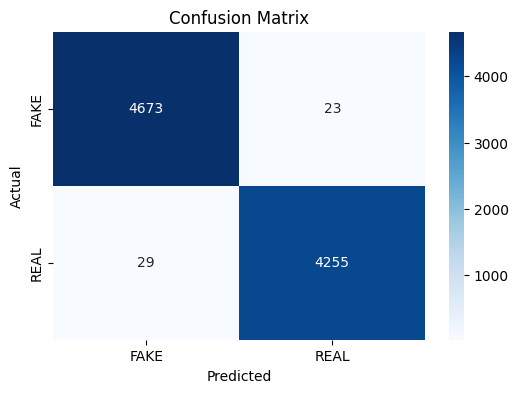

In [42]:
#  Train-Test Split
X = df["text"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=7,
    stratify=y
)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.7
)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test  = tfidf_vectorizer.transform(X_test)


pac = PassiveAggressiveClassifier(
    max_iter=50,
    random_state=7
)

pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test) #Predictions

accuracy = accuracy_score(y_test, y_pred) #accuracy
print(f"Accuracy: {round(accuracy * 100, 2)}%")
print("\nClassification Report:") # Classification Report

print(classification_report(
    y_test,
    y_pred,
    target_names=["FAKE", "REAL"]
))

cm = confusion_matrix(
    y_test,
    y_pred,
    labels=[0, 1]   # 0 = FAKE, 1 = REAL
)# Confusion Matrix


cm_df = pd.DataFrame(
    cm,
    index=["FAKE", "REAL"],
    columns=["FAKE", "REAL"]
)

print("\nConfusion Matrix:")
print(cm_df)

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_df,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [44]:
#  Logistic Regression (L2)

# Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
fake = pd.read_csv("dataset/Fake.csv")
true = pd.read_csv("dataset/True.csv")

# Create labels
fake["category"] = 1   # Fake news
true["category"] = 0   # True news

# Combine datasets
df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Features and target
X = df["text"]
y = df["category"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    stop_words="english",
    max_df=0.7
)

X_train_features = tfidf.fit_transform(X_train)
X_test_features = tfidf.transform(X_test)

# Logistic Regression (L2 Regularization)
log_reg = LogisticRegression(
    C=0.5,
    penalty="l2",
    max_iter=1000,
    n_jobs=-1
)

# Train model
log_reg.fit(X_train_features, y_train)

# Predictions
y_pred = log_reg.predict(X_test_features)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9775055679287306

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4270
           1       0.98      0.98      0.98      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [ ]:
 ##  Model Training
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Initialize a Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='linear', probability=True)  # You can experiment with different kernels
svc_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = svc_classifier.predict(tfidf_test)

# ## 6. Evaluate the Model
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score (SVC): {round(score*100, 2)}%")

# Save the SVC model
pickle.dump(svc_classifier, open('svc_model.pkl', 'wb'))


# Initialize a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(tfidf_test)

# Evaluate the Model
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score (Naive Bayes): {round(score*100, 2)}%")

# Save the Naive Bayes model
pickle.dump(nb_classifier, open('nb_model.pkl', 'wb'))

# Check the model and vector if they work
load_model = pickle.load(open('svc_model.pkl', 'rb'))  # Or 'nb_model.pkl'
vector_load = pickle.load(open('vector.pkl', 'rb'))

# Test the models
value = fake_news_detect("""kayde king kaydeek novemb lesson tonight dem loss time democrat start listen voter stop run establish candid peopl berni peopl berni novemb dem want tight race work berni walker bragman walkerbragman novemb new york time columnist paul krugman one hillari clinton outspoken surrog contenti democrat primari blame clinton poor perform green parti candid jill stein far receiv neglig number vote nation say stein ralph nader prevent clinton victori account berniesteach threw krugman analysi back face candid issu take respons https co khyouusrf teacher berni berniesteach novemb ana navarro republican recent endors hillari clinton sum preposter natur presidenti elect tweet gop nomin damn candid could lose hillari clinton democrat nomin damn candid could lose trump ana navarro ananavarro novemb popular left wing facebook page pro sander primari respond trump surg simpli post meme sander face text could avoid thank noth dnc meme share almost time less hour post tuesday novemb berni sander endors hillari clinton democrat nation convent juli mani support remain adam refus support dnc anoint candid point wikileak revel top offici dnc work behind scene tip scale clinton favor coordin media figur circul anti sander narrat rather attribut potenti trump presid gop nomine perceiv popular among voter close elect could credit hillari clinton unfavor rate accord realclearpolit anywher percent voter negat opinion democrat nomine pm eastern florida michigan pennsylvania wisconsin remain close call clinton elector vote trump zach cartwright activist author richmond virginia enjoy write polit govern media send email email protect""")
value
if value == 'FAKE':
    print('Fake news')
else:
    print('Real news')

In [45]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data (df must already exist; otherwise uncomment below)
# df = pd.read_csv("dataset/news.csv")

# Features and target
X = df["text"]        # change column name if needed
y = df["category"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Vectorization
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.7
)

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# L1 Logistic Regression
log_reg_l1 = LogisticRegression(
    C=0.3,
    penalty="l1",
    solver="liblinear",
    max_iter=1000
)

log_reg_l1.fit(X_train_features, y_train)

# Prediction
y_pred_l1 = log_reg_l1.predict(X_test_features)

# Accuracy
print("L1 Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_l1))


L1 Logistic Regression Accuracy: 0.9924276169265034


In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(
    C=0.1,           # strong regularization
    max_iter=1000,
    loss="hinge",
    random_state=42
)

pac.fit(X_train_features, y_train)

y_pred_pac = pac.predict(X_test_features)

print("Passive-Aggressive Accuracy:",
      accuracy_score(y_test, y_pred_pac))


Passive-Aggressive Accuracy: 0.9938752783964365


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 0.5, 1.0]
}

grid = GridSearchCV(
    LogisticRegression(
        penalty="l2",
        solver="liblinear",
        max_iter=1000
    ),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train_features, y_train)

print("Best C:", grid.best_params_)
print("Best CV F1:", grid.best_score_)


Best C: {'C': 1.0}
Best CV F1: 0.9830643155675889


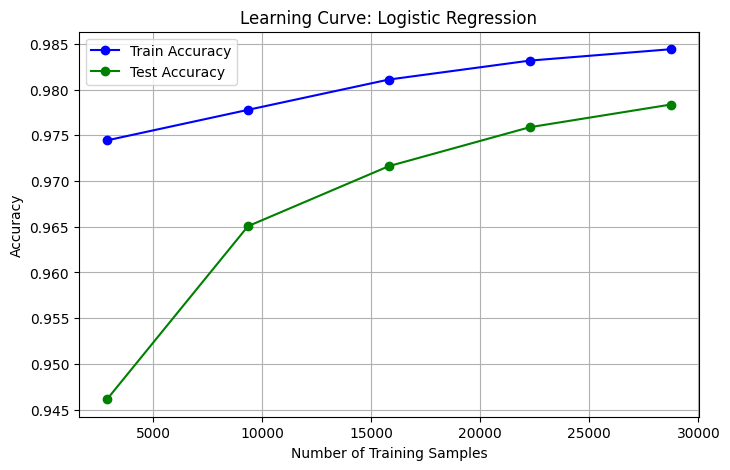

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Use the same Logistic Regression
model = LogisticRegression(
    C=0.5,
    penalty='l2',
    max_iter=1000,
    n_jobs=-1
)

# Define train sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 5)  # 10%, 30%, 50%, 70%, 100%

# Stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train_features,
    y_train,
    train_sizes=train_sizes,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Average scores across folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Train Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Test Accuracy')
plt.title('Learning Curve: Logistic Regression')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [49]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report


In [50]:
models = {
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(
        max_iter=1000,
        C=0.5,
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=30,          # limits overfitting
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),

    "Support Vector Machine": LinearSVC(
        C=0.5,                 # regularization
        max_iter=3000,
        random_state=42
    ),

    "Naive Bayes": MultinomialNB(
        alpha=0.5              # smoothing
    )
}


In [51]:
for name, model in models.items():
    print("=" * 60)
    print(f"Training: {name}")

    model.fit(X_train_features, y_train)

    y_pred = model.predict(X_test_features)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

    print(classification_report(
        y_test,
        y_pred,
        target_names=["FAKE", "REAL"]
    ))


Training: Passive Aggressive Classifier
Accuracy: 0.9939

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4270
        REAL       0.99      0.99      0.99      4710

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Training: Random Forest
Accuracy: 0.9808

              precision    recall  f1-score   support

        FAKE       0.98      0.98      0.98      4270
        REAL       0.98      0.98      0.98      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Training: Support Vector Machine
Accuracy: 0.9918

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4270
        REAL       0.99      0.99      0.99      4710

    accuracy                   

## Saving the models

In [53]:
import pickle

pickle.dump(tfidf_vectorizer, open('vector.pkl', 'wb'))
pickle.dump(pac, open('pac_model.pkl', 'wb'))

In [54]:
# Check the model and vector if they work
load_model = pickle.load(open('pac_model.pkl', 'rb'))
vector_load = pickle.load(open('vector.pkl', 'rb'))

In [55]:
def fake_news_detect(news):
    news = stemming(news)
    input_data = [news]
    vector_form1 = vector_load.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

# Load data
fake = pd.read_csv("dataset/Fake.csv")
true = pd.read_csv("dataset/True.csv")
fake["category"] = 1
true["category"] = 0
df = pd.concat([fake, true]).sample(frac=1, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["category"], test_size=0.2, random_state=42
)

# TF-IDF + Model
tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train, y_train)

# Predict function
def fake_news_detect(text):
    return "Fake News" if model.predict(tfidf.transform([text]))[0] == 1 else "Real News"

# Test
fake_news_detect("This is a sample news text")


'Fake News'

Accuracy: 0.9928730512249443


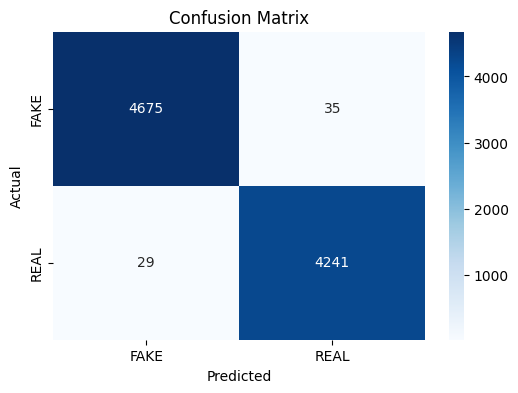

              precision    recall  f1-score   support

        REAL       0.99      0.99      0.99      4270
        FAKE       0.99      0.99      0.99      4710

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



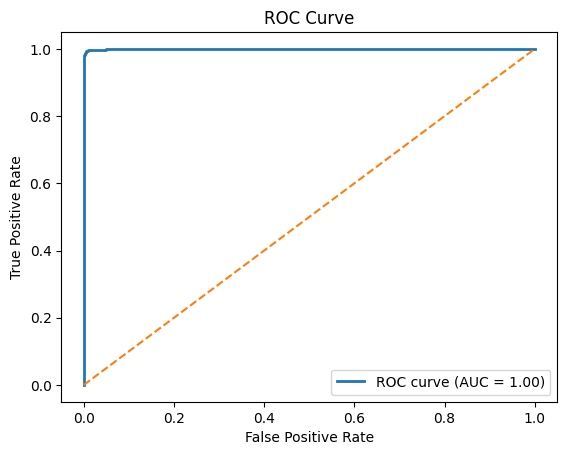

Fake News


In [62]:
# ==============================
# Imports
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# ==============================
# Load Dataset
# ==============================
fake = pd.read_csv("dataset/Fake.csv")
true = pd.read_csv("dataset/True.csv")

fake["category"] = 1   # FAKE
true["category"] = 0   # REAL

df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df["text"]
y = df["category"]

# ==============================
# Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ==============================
# TF-IDF Vectorization
# ==============================
tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ==============================
# Model Training
# ==============================
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# ==============================
# Predictions
# ==============================
y_pred = model.predict(X_test_tfidf)

# ==============================
# Accuracy
# ==============================
print("Accuracy:", accuracy_score(y_test, y_pred))

# ==============================
# Confusion Matrix (FIXED)
# ==============================
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["FAKE", "REAL"],
    yticklabels=["FAKE", "REAL"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==============================
# Classification Report (FIXED)
# ==============================
print(
    classification_report(
        y_test,
        y_pred,
        target_names=["REAL", "FAKE"]
    )
)

# ==============================
# ROC Curve & AUC (FIXED)
# ==============================
y_scores = model.decision_function(X_test_tfidf)

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# ==============================
# Prediction Function
# ==============================
def fake_news_detect(text):
    vector = tfidf.transform([text])
    pred = model.predict(vector)[0]
    return "Fake News" if pred == 1 else "Real News"

# ==============================
# Test
# ==============================
print(
    fake_news_detect(
        "The government announced a new policy to improve healthcare."
    )
)


In [66]:
from sklearn.naive_bayes import MultinomialNB

# Example: Train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [67]:
import pickle

# Save the trained Naive Bayes model
pickle.dump(nb_classifier, open("nb_model.pkl", "wb"))


In [ ]:
import pickle
# Save TF-IDF vectorizer
pickle.dump(tfidf, open("vector.pkl", "wb"))

# Save Naive Bayes model
pickle.dump(nb_classifier, open("nb_model.pkl", "wb"))

# Load TF-IDF vectorizer
vector_load = pickle.load(open("vector.pkl", "rb"))

# Load a model (choose one)
load_model = pickle.load(open("nb_model.pkl", "rb"))


Accuracy score (Naive Bayes): 93.24%
Prediction: FAKE
Fake news


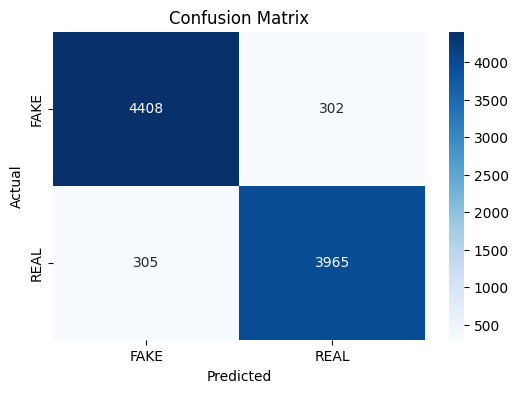

              precision    recall  f1-score   support

        REAL       0.93      0.93      0.93      4270
        FAKE       0.94      0.94      0.94      4710

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



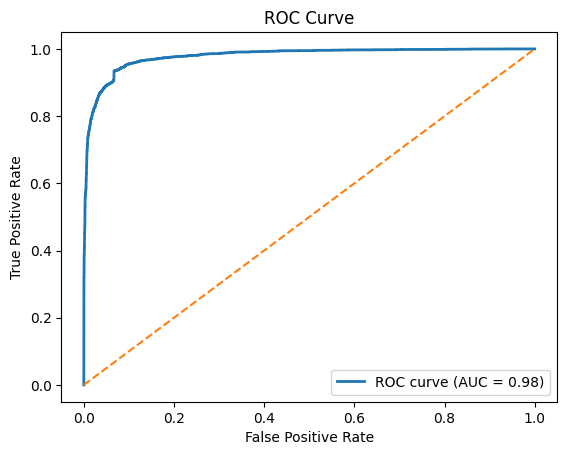

In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

fake = pd.read_csv("dataset/Fake.csv")
true = pd.read_csv("dataset/True.csv")

fake["category"] = 1   # FAKE
true["category"] = 0   # REAL

df = pd.concat([fake, true]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df["text"]
y = df["category"]
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

# Save the vectorizer
pickle.dump(tfidf, open("vector.pkl", "wb"))

# Train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# Predictions
y_pred = nb_classifier.predict(tfidf_test)

# Evaluate Accuracy
print(f"Accuracy score (Naive Bayes): {round(accuracy_score(y_test, y_pred)*100, 2)}%")

# Save the Naive Bayes model
pickle.dump(nb_classifier, open("nb_model.pkl", "wb"))

# Load Model & Vectorizer for Testing
load_model = pickle.load(open("nb_model.pkl", "rb"))
vector_load = pickle.load(open("vector.pkl", "rb"))

# Prediction Function
def fake_news_detect(text):
    vector = vector_load.transform([text])
    pred = load_model.predict(vector)[0]
    return "FAKE" if pred == 1 else "REAL"

# Test Example
sample_news = """
kayde king kaydeek novemb lesson tonight dem loss time democrat start listen voter stop run
"""
value = fake_news_detect(sample_news)

print("Prediction:", value)
if value == "FAKE":
    print("Fake news")
else:
    print("Real news")

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=["REAL", "FAKE"]))# Classification Report

y_scores = nb_classifier.predict_proba(tfidf_test)[:, 1]  # probability of FAKE
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
